# What is Sorting?
Sorting is the process of arranging a list of items in a particular order (i.e. ascending, descending, etc.)

In [1]:
from manim import *
import random
#from manim_voiceover import VoiceoverScene
#from manim_voiceover.services.recorder import RecorderService

Manim Community v0.18.0

In [7]:
# Introducing the problem of sorting
class Introduction(Scene):
    def construct(self):
        title = Text("Sorting Algorithms").scale(1.5)
        self.play(Write(title))
        self.wait(1)
        self.play(FadeOut(title))

        problem = Text("Given a list of numbers, \n sort them in ascending order.").scale(1.5)
        self.play(Write(problem))
        self.wait(1)
        self.play(FadeOut(problem))

        self.wait(1)

%manim -ql -v WARNING Introduction

In [14]:
# Define an array object so that when it is animated it is a long rectangle with small squares inside
class Array(Rectangle):
    def __init__(self, values, **kwargs):
        self.values = values # List of values in the array
        self.n = len(values) # Number of elements in the array
        
        # Call the constructor of the parent class (Rectangle)
        # Ensure the rectangle is large enough to contain all squares
        super().__init__(width=self.n, height=1, **kwargs)

        # Initialize the squares and texts
        self.squares = VGroup()  # Group for squares
        self.texts = VGroup()    # Group for text
        
        # Calculate the side length of each square based on the number of elements
        square_side = self.width / self.n

        # Create squares and texts for each value
        for i, value in enumerate(self.values):
            square = Square(side_length=square_side)
            # Position each square within the rectangle
            square.move_to(self.get_left() + RIGHT * square_side * (0.5 + i))
            self.squares.add(square)

            text = Text(str(value), font_size=36)
            text.move_to(square.get_center())
            self.texts.add(text)

        # Add the squares and texts as submobjects
        self.add(self.squares, self.texts)
        
    def update_array(self, new_values):
        """ Update the array with new values. """
        self.values = new_values
        for text, value in zip(self.texts, self.values):
            text.set_text(str(value))
    

In [20]:
class ArrayScene(Scene):
    def construct(self):
        # Create the array object
        array_values = [5, 3, 1, 2, 4]
        array = Array(array_values)
        
        # Center the array in the scene
        array.move_to(ORIGIN)
        
        # Animate the array
        self.play(Write(array))
        
        self.wait()
    
%manim -ql -v WARNING ArrayScene

In [4]:
class LatexArray(Rectangle):
    def __init__(self, n, **kwargs):
        self.n = n  # Number of elements in the array

        # Call the constructor of the parent class (Rectangle)
        super().__init__(width=self.n, height=1, **kwargs)

        # Initialize the squares and texts
        self.squares = VGroup()  # Group for squares
        self.texts = VGroup()    # Group for text

        # Calculate the side length of each square based on the number of elements
        square_side = self.width / self.n

        # Create squares and LaTeX texts for each value
        for i in range(self.n):
            square = Square(side_length=square_side)
            # Position each square within the rectangle
            square.move_to(self.get_left() + RIGHT * square_side * (0.5 + i))
            self.squares.add(square)

            #if i == 0:
            #    latex_text = f"a_{{{i+1}}}"
            #elif i == self.n - 1:
            #    latex_text = f"a_{{{i+1}}}"
            #else:
            #    latex_text = "\\dots"
            if i == self.n - 2:
                latex_text = "\\dots"
            elif i == self.n - 1:
                latex_text = f"a_{{n}}"
            else:
                latex_text = f"a_{{{i+1}}}"
                
            
            text = MathTex(latex_text, font_size=36)
            text.move_to(square.get_center())
            self.texts.add(text)

        # Add the squares and texts as submobjects
        self.add(self.squares, self.texts)

    def update_array(self, new_values):
        """ Update the array with new values. """
        # Implement the logic to update LaTeX text if needed
        pass


In [5]:
class LatexArrayScene(Scene):
    def construct(self):
        # Create the array object
        array = LatexArray(5)

        # Center the array in the scene
        array.move_to(ORIGIN)

        # Animate the array
        self.play(Write(array))

        self.wait()

%manim -ql -v WARNING LatexArrayScene

# Why Learn Sorting?
This is a fundamental problem in computer science and is likely the very first 'problem' you will confront when learning about Alrorithms and Data Structures.

Algorithms as a field can be boiled down to the Science of Problem Solving. 

Sorting therefore, is a good introduction to the field, as it is a problem that is easy to understand, and has a wide range of applications.

In [40]:
# Constructing a scene to introduce the formal definition of the sorting problem
class OpeningScene(Scene):
    def construct(self):
        
        # Create the definition
        definition = Tex(r"""
        \textbf{Sorting Problem:} \\
        Given a list of numbers $a_1, a_2, \dots, a_n$, \\
        sort them in ascending order.
        """).scale(1.5)
        self.play(Write(definition))
        self.wait(1)
        self.play(FadeOut(definition))
        
        # Move the above text up, fade out the title "Sorting Problem" keep the problem prompt
        definition.shift(UP)
        #self.play(FadeOut(definition[0]))
        self.wait(1)
        
        # Using the Latex Array as this is a definition of the problem on a mathematical scale
        array = LatexArray(5)
        array.move_to(ORIGIN)
        self.play(Write(array))
        self.wait(1)
        self.play(FadeOut(array))
        
    
        
%manim -ql -v WARNING FormalDefinition

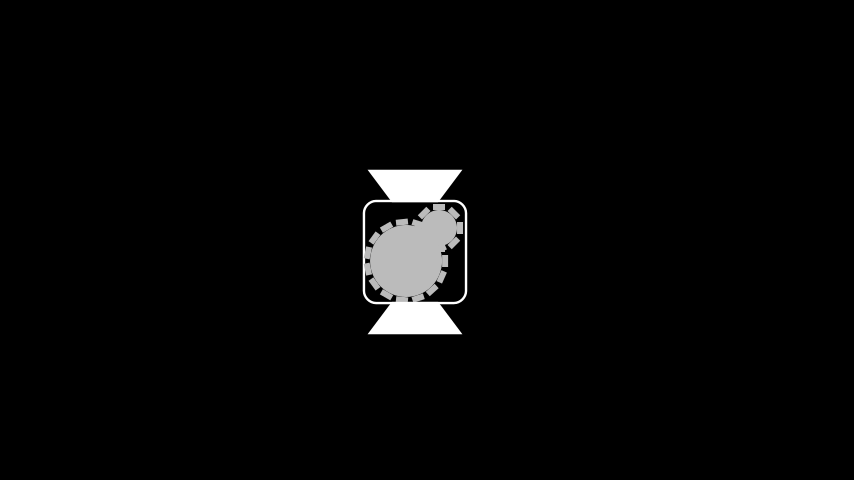

In [227]:
from manim import *

class Gear(VGroup):
    def __init__(self, num_teeth=8, radius=1, tooth_size=0.1, **kwargs):
        super().__init__(**kwargs)
        self.radius = radius  # Store radius as an instance attribute
        self.extended_radius = radius + tooth_size  # Include the tooth size in the extended radius
        
        # Main circle
        circle = Circle(radius=self.radius)
        self.add(circle)

        # Teeth around the circle
        for i in range(num_teeth):
            angle = i * TAU / num_teeth
            # Adding a small rectangle as a tooth
            tooth = Rectangle(height=tooth_size, width=tooth_size*2)
            tooth.set_fill(WHITE, opacity=1)
            tooth.set_stroke(width=0)
            tooth.next_to(circle, UP, buff=0)
            tooth.rotate(angle, about_point=circle.get_center())
            self.add(tooth)

        # Central circle to cover overlapping parts
        central_circle = Circle(radius=tooth_size*1.5)
        central_circle.set_fill(BLACK, opacity=1)
        self.add(central_circle)
        
        self.set_stroke(width=0)
        self.set_fill(GREY_B, opacity=1)


class GearBox(VGroup):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        # Create two gears
        self.gear1 = Gear(num_teeth=15, radius=0.6, tooth_size=0.1)  # Larger gear
        self.gear2 = Gear(num_teeth=8, radius=0.3, tooth_size=0.1)   # Smaller gear

        # Calculate the total width and height needed for the box
        buffer_space = 0.4  # Increased buffer space
        total_width = self.gear1.extended_radius + self.gear2.extended_radius + buffer_space
        total_height = total_width  # Making the box square

        # Create the box, adjusting its size based on gears
        box = RoundedRectangle(corner_radius=0.2, height=total_height+0.2, width=total_width+0.2)
        self.add(box)

        # Position gears in the desired corners
        self.gear1.move_to(box.get_center() + LEFT * self.gear1.extended_radius / 2 + DOWN * self.gear1.extended_radius / 2)
        self.gear2.move_to(box.get_center() + RIGHT * self.gear2.extended_radius / 2 + UP * self.gear2.extended_radius / 2)

        self.add(self.gear1, self.gear2)
        
        # Create an upside-down trapezoid for input
        trapezoid_height = 0.5
        trapezoid_bottom_width = total_width / 2
        trapezoid_top_width = total_width
        trapezoid = Polygon(
            box.get_top(),
            box.get_top() + LEFT * trapezoid_top_width / 2,
            box.get_top() + LEFT * trapezoid_bottom_width / 2 + UP * trapezoid_height,
            box.get_top() + RIGHT * trapezoid_bottom_width / 2 + UP * trapezoid_height,
            box.get_top() + RIGHT * trapezoid_top_width / 2,
            color=WHITE,
            fill_opacity=1
        )
        
        self.trapezoid = trapezoid
        
        # Rotate and shift the trapezoid
        rotation_angle = 180 * DEGREES  # Rotation angle (can be adjusted)
        trapezoid.rotate(rotation_angle, about_point=trapezoid.get_center())
        
        shift_vector = DOWN * 0.2 + LEFT * 0.2 # Shift direction and magnitude (can be adjusted)
        trapezoid.shift(shift_vector)
        
        self.add(trapezoid)
        
        # Create another trapezoid for output
        trapezoid2_height = 0.5
        trapezoid2_bottom_width = total_width / 2
        trapezoid2_top_width = total_width
        trapezoid2 = Polygon(
            box.get_bottom(),
            box.get_bottom() + LEFT * trapezoid2_top_width / 2,
            box.get_bottom() + LEFT * trapezoid2_bottom_width / 2 + DOWN * trapezoid2_height,
            box.get_bottom() + RIGHT * trapezoid2_bottom_width / 2 + DOWN * trapezoid2_height,
            box.get_bottom() + RIGHT * trapezoid2_top_width / 2,
            color=WHITE,
            fill_opacity=1
        )
        
        self.trapezoid2 = trapezoid2
        
        # Rotate and shift the trapezoid
        rotation_angle = 180 * DEGREES  # Rotation angle (can be adjusted)
        trapezoid2.rotate(rotation_angle, about_point=trapezoid2.get_center())
        
        shift_vector = DOWN * 0.2 + LEFT * 0.2
        # Shift direction and magnitude (can be adjusted)
        trapezoid2.shift(shift_vector)
        
        self.add(trapezoid2)

        # Define the updater function for gear rotation
        self.gear1.add_updater(lambda m, dt: m.rotate(TAU/8 * dt))
        self.gear2.add_updater(lambda m, dt: m.rotate(-TAU/8 * dt * self.gear1.radius / self.gear2.radius))

        box.shift(LEFT * 0.2)  # shift the box to the left and down a bit
        box.shift(DOWN * 0.2)  # shift the box to the left and down a bit

        
class GearBoxScene(Scene):
    def construct(self):
        gearbox = GearBox()        
        self.play(FadeIn(gearbox))
        self.wait(5)
        gearbox.gear1.clear_updaters()
        gearbox.gear2.clear_updaters()
        self.wait(1)

# To run this scene, use the following command in your terminal:
%manim -ql -s -v WARNING GearBoxScene

# Scene Structure

## Scene 1: Introduction
Voiceover: "What is an algorithm?"
Tex: "Algorithm"



In [254]:
class OpeningScene(Scene):
    def construct(self):
        # First, what is an Algorithm?
        tx1 = Text("Algorithm").scale(1.0)
        self.play(Write(tx1))
        self.wait(1)
        
        # Move the text up to the top of the scene
        self.play(tx1.animate.shift(UP*3))
        self.wait(1)
        
        # Introduce the concept of Inputs
        input_text = Text("Inputs", color=BLUE).next_to(tx1, DOWN * 0.5, buff=1)
        self.play(Write(input_text))

        # Create input circles
        inputs = VGroup(*[Circle(color=BLUE).scale(0.2) for _ in range(3)])
        inputs.arrange(RIGHT, buff=0.5)
        inputs.next_to(input_text, DOWN)

        # Create square brackets and variable label
        left_bracket = Text("[", color=WHITE).scale(1.5)
        right_bracket = Text("]", color=WHITE).scale(1.5)
        variable_label = Text("x =", color=WHITE).scale(0.7)

        # Position the brackets and label
        left_bracket.next_to(inputs, LEFT, buff=0.1)
        right_bracket.next_to(inputs, RIGHT, buff=0.1)
        variable_label.next_to(left_bracket, LEFT, buff=0.2).align_to(left_bracket, DOWN)

        # Group the circles with the brackets
        input_group = VGroup(left_bracket, inputs, right_bracket)
        input_group.next_to(input_text, DOWN)

        # Animate the creation of the inputs and brackets
        self.play(LaggedStart(*[DrawBorderThenFill(obj) for obj in inputs], lag_ratio=0.5))
        self.play(Write(left_bracket), Write(right_bracket), Write(variable_label))
        
        # Introduce the GearBox (Algorithm at Work)
        gearbox = GearBox()
        # Move the gear box to just below the inputs
        gearbox.move_to(input_text.get_center() + DOWN*3.0)
        self.play(FadeIn(gearbox))
        
        # Add 'f(x) =' Text next to the GearBox
        function_label = Text("f(x) =", color=WHITE).scale(0.7)
        function_label.next_to(gearbox, LEFT, buff=0.4)
        self.play(Write(function_label))
        
        # Animate the inputs and brackets being sucked into the gearbox
        target_point = gearbox.trapezoid.get_center()
        
        # Animate the input_group being squeezed into the gearbox
        self.play(
            input_group.animate.scale(0.1).move_to(target_point),
            run_time=1.5,
            rate_func=linear
        )
        
        # Fade out the variable label and input_group at the same time
        self.play(
            FadeOut(variable_label),
            FadeOut(input_group),
            run_time=0.1
        )
        
        # Fade out the input_text and move the gear box and the function label up
        self.play(
            FadeOut(input_text),
            gearbox.animate.shift(UP*1.5),
            function_label.animate.shift(UP*1.5),
            run_time=0.5
        )
        
        # Create a new instance of the input_group, representing the transformed array
        transformed_inputs = VGroup(*[Circle(color=BLUE).scale(0.2) for _ in range(3)])
        transformed_inputs.arrange(RIGHT, buff=0.5)
        
        # Create square brackets
        transformed_left_bracket = Text("[", color=WHITE).scale(1.5)
        transformed_right_bracket = Text("]", color=WHITE).scale(1.5)
        
        # Position the brackets and label
        transformed_left_bracket.next_to(transformed_inputs, LEFT, buff=0.1)
        transformed_right_bracket.next_to(transformed_inputs, RIGHT, buff=0.1)
       
        transformed_group = VGroup(transformed_left_bracket, transformed_inputs, transformed_right_bracket)

        # Position the transformed_group to emerge from the side of the gearbox
        #transformed_group.next_to(gearbox, RIGHT, buff=1.0)
        
        # Initially scale down and position the transformed_group next to the gearbox
        transformed_group.scale(0.1)  # Start very small
        transformed_group.next_to(gearbox, RIGHT, buff=0.2)

        # Animate the transformed_group expanding outwards from the gearbox
        self.play(
            transformed_group.animate.scale(10).next_to(gearbox, RIGHT, buff=0.5),
            run_time=1,
            rate_func=smooth
        )
        
        # Loop through the circles in the transformed input array and randomly change their colors and shapes
        for circle in transformed_inputs:
            # Choose a random color and shape
            random_color = random.choice([RED, GREEN, BLUE, YELLOW])
            random_shape_class = random.choice([Circle, Square, Triangle])
            
            # Create a new shape of the chosen type, with the same size and position as the circle
            new_shape = random_shape_class(color=random_color).scale(0.2)
            new_shape.move_to(circle.get_center())

            # Animate the transformation of the circle into the new shape
            self.play(Transform(circle, new_shape), run_time=1)
        
        # Set target point as the center of the gearbox
        target_point = gearbox.get_center()
        
        # Shrink the transformed_group back into the gearbox
        self.play(
            transformed_group.animate.scale(0.01).move_to(target_point),
            run_time=1.0,
            rate_func=linear
        )
        
        # Fade out the transformed input_group 
        self.play(
            FadeOut(transformed_group),
            run_time=0.1
        )
        
        # Regrow the transformed group from the bottom trapezoid of the gearbox
        # Set the new target point for the bottom trapezoid of the gearbox
        target_point = gearbox.trapezoid2.get_center() + DOWN*0.7

        # Scale up the transformed_group from the new target point
        self.play(
            transformed_group.animate.scale(100).move_to(target_point),
            run_time=1.0,
            rate_func=linear
        )
        
        self.wait(2)
        
        # Fade out the 'f(x)', the top and bottom trapezoids of the gearbox and the output group
        self.play(
            FadeOut(function_label),
            FadeOut(gearbox.trapezoid),
            FadeOut(gearbox.trapezoid2),
            FadeOut(transformed_group),
            run_time=0.3
        )
        
        # Remove the trapezoids from the gearbox
        gearbox.remove(gearbox.trapezoid)
        gearbox.remove(gearbox.trapezoid2)
        
        # Move the gearbox down to its original position
        self.play(
            gearbox.animate.shift(DOWN*0.5),
            run_time=0.5
        )
                
        self.wait(1)
        
        # Lets take a look at what is happening inside of this gearbox
        tx2 = Text("What's happening inside?").scale(0.8)
        tx2.shift(UP*2.0)
        
        self.play(Write(tx2))
        
        self.wait()
        
        self.play(
            FadeOut(gearbox.gear1),
            FadeOut(gearbox.gear2),
        )
        
        # remove the gears from the gearbox
        gearbox.remove(gearbox.gear1)
        gearbox.remove(gearbox.gear2)
        
        # Fade out the text and expand the rounded square out of the bounds of the camera
        self.play(
            FadeOut(tx2, tx1),
        )
        
        self.play(
            gearbox.animate.scale(50.0),
            run_time=1.0
        )

%manim -qh -v WARNING OpeningScene

# Scene 2: Algorithms are mathematical

Voiceover: "The main idea I hope to convey here is that algorithms are mathematical. They are not just a bunch of steps to follow. They are a mathematical process that can be proven to work."

Tex: "Algorithm => Mathematical Process"
Tex: Converts to "f(x)"

In [279]:
class AlgorithmsAreMathScene(Scene):
    def construct(self):
        # First, what is an Algorithm?
        tx1 = Text("What is an Algorithm?").scale(1.0)
        
        tx1.move_to(UP*2.5)
        
        self.play(Write(tx1))
        
        # Gearbox for visual effect
        gearbox = GearBox()
        # Remove the trapazoids from the gearbox
        gearbox.remove(gearbox.trapezoid)
        gearbox.remove(gearbox.trapezoid2)
        gearbox.move_to(ORIGIN)
        self.play(FadeIn(gearbox))

        # Is it just code?
        # Box for "Just Code"
        code_box = RoundedRectangle(height=2, width=3, corner_radius=0.2)
        code_box.color = YELLOW
        code_box.to_edge(LEFT)
        code_text = Text("{...}", font="Monospace", font_size=36)  # Represents generic code
        code_text.move_to(code_box.get_center())
        code_label = Text("Just Code?", font_size=24).next_to(code_box, UP)

        # Is it just a set of magical instructions?
        # Box for "Magical Instructions"
        magic_box = RoundedRectangle(height=2, width=3, corner_radius=0.2)
        magic_box.set_color(RED)
        magic_box.to_edge(RIGHT)
        
        # Simpler magic icon: A single star
        magic_icon = Star(n=5, outer_radius=0.5, inner_radius=0.2, color=WHITE)
        magic_icon.move_to(magic_box.get_center())

        # Label for "Magical Instructions"
        magic_label = Text("Magical Instructions?", font_size=24).next_to(magic_box, UP)

        # Add boxes, icons, and labels to the scene
        
        self.play(Create(code_box),
                  Write(code_text),
                  Write(code_label),
                  run_time = 1.0
                )
        
        self.play(Create(magic_box),
                  Write(magic_icon),
                  Write(magic_label),
                  run_time = 1.0
                )

        self.wait(2)
        
                        
    
%manim -ql -v WARNING AlgorithmsAreMathScene